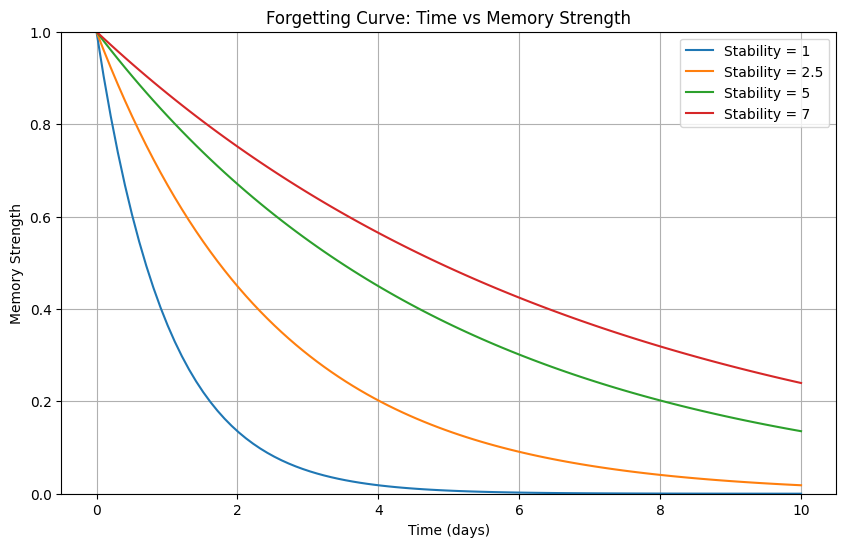

In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np

def forgetting_curve(initial_strength, time_elapsed, stability=2.5):
    return initial_strength * math.exp(-time_elapsed / stability)

# 创建时间数据点
time_range = np.linspace(0, 10, 100)

# 为不同的 stability 值计算记忆强度
stabilities = [1, 2.5, 5, 7]
plt.figure(figsize=(10, 6))

for s in stabilities:
    strengths = [forgetting_curve(1, t, s) for t in time_range]
    plt.plot(time_range, strengths, label=f'Stability = {s}')
plt.title('Forgetting Curve: Time vs Memory Strength')
plt.xlabel('Time (days)')
plt.ylabel('Memory Strength')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [23]:

def calculate_review_interval(current_interval, ease_factor, current_strength, success_rate):
    strength_factor = 1 + (current_strength - 0.5) * 2
    success_factor = 0.8 + success_rate * 0.4
    new_interval = current_interval * ease_factor * strength_factor * success_factor
    min_interval = 0.25
    max_interval = 30
    return max(min_interval, min(round(new_interval, 2), max_interval))

# 设置固定参数
current_interval = 1  # 1 day
ease_factor = 2.5  # 最大难度系数

# 创建数据点
strengths = np.linspace(0, 1, 100)
success_rates = np.linspace(0, 1, 100)

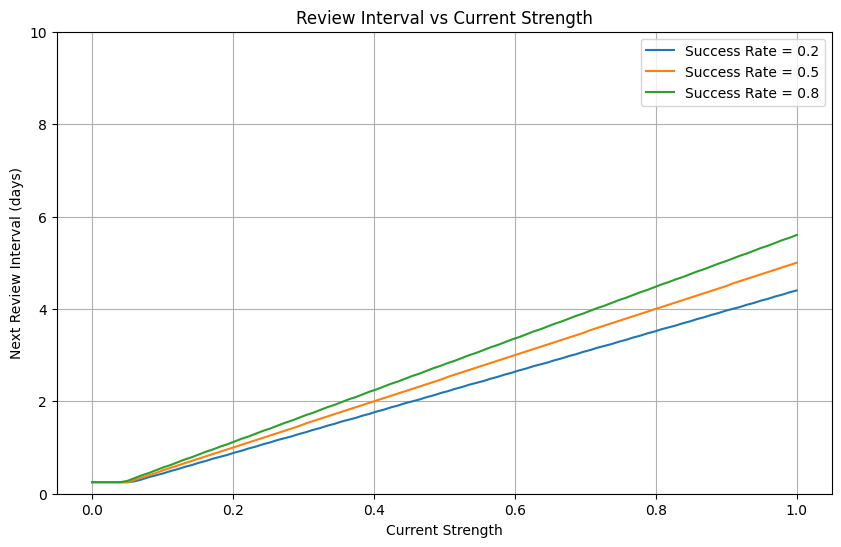

In [25]:
# 图1：展示 current_strength 的影响
plt.figure(figsize=(10, 6))
for sr in [0.2, 0.5, 0.8]:
    intervals = [calculate_review_interval(current_interval, ease_factor, s, sr) for s in strengths]
    plt.plot(strengths, intervals, label=f'Success Rate = {sr}')

plt.title('Review Interval vs Current Strength')
plt.xlabel('Current Strength')
plt.ylabel('Next Review Interval (days)')
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.show()


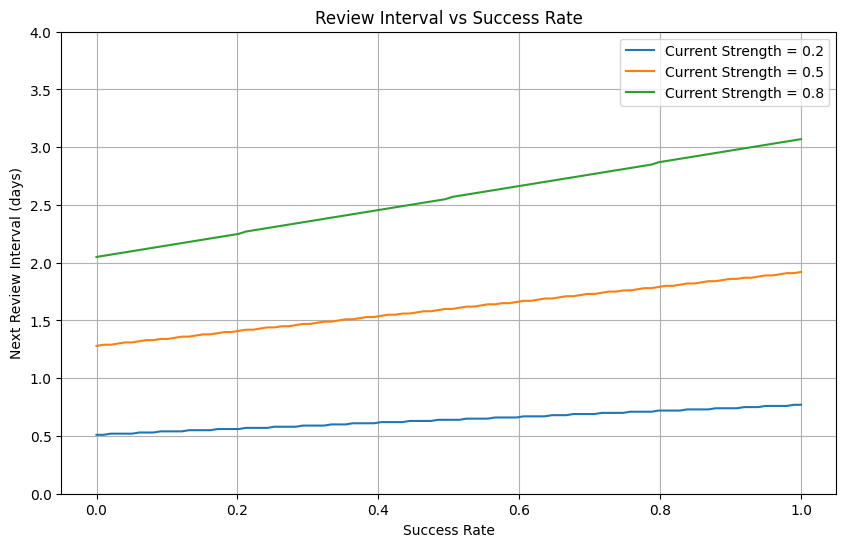

In [15]:
# 图2：展示 success_rate 的影响
plt.figure(figsize=(10, 6))
for cs in [0.2, 0.5, 0.8]:
    intervals = [calculate_review_interval(current_interval, ease_factor, cs, sr) for sr in success_rates]
    plt.plot(success_rates, intervals, label=f'Current Strength = {cs}')

plt.title('Review Interval vs Success Rate')
plt.xlabel('Success Rate')
plt.ylabel('Next Review Interval (days)')
plt.legend()
plt.grid(True)
plt.ylim(0, 4)
plt.show()

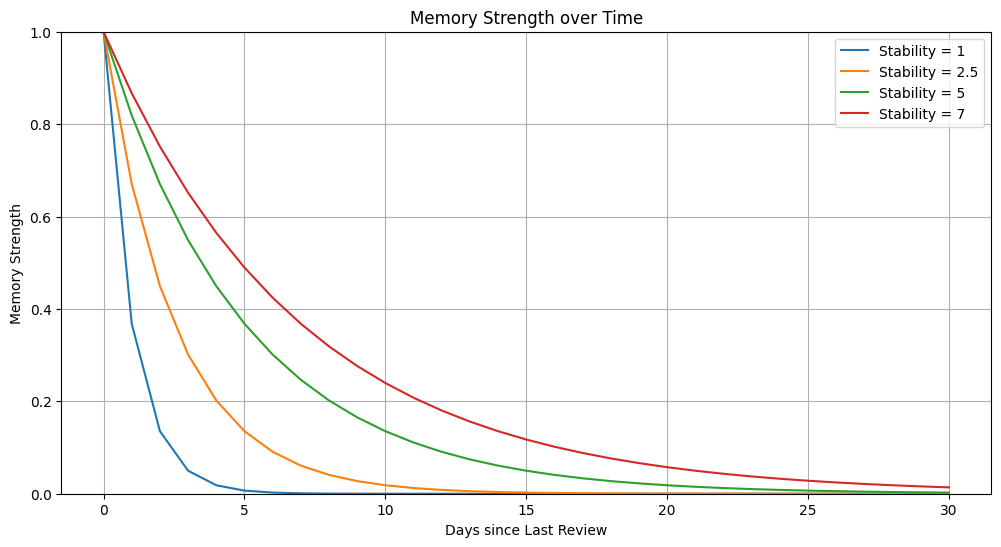

In [19]:
from datetime import datetime, timedelta

def forgetting_curve(initial_strength, time_elapsed, stability=2.5):
    return initial_strength * math.exp(-time_elapsed / stability)

def calculate_memory_strength(review_date, last_review_date, current_strength, stability=2.5):
    time_elapsed = (review_date - last_review_date).total_seconds()
    time_elapsed = round(time_elapsed / (24 * 3600), 2)
    new_strength = forgetting_curve(current_strength, time_elapsed, stability)
    return new_strength

# 设置固定参数
last_review_date = datetime(2023, 1, 1)
current_strength = 1.0  # 初始强度为100%

# 创建时间范围（30天）
days = list(range(31))
review_dates = [last_review_date + timedelta(days=d) for d in days]

# 计算不同稳定性下的记忆强度
stabilities = [1, 2.5, 5, 7]

plt.figure(figsize=(12, 6))

for stability in stabilities:
    strengths = [calculate_memory_strength(date, last_review_date, current_strength, stability) for date in review_dates]
    plt.plot(days, strengths, label=f'Stability = {stability}')

plt.title('Memory Strength over Time')
plt.xlabel('Days since Last Review')
plt.ylabel('Memory Strength')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

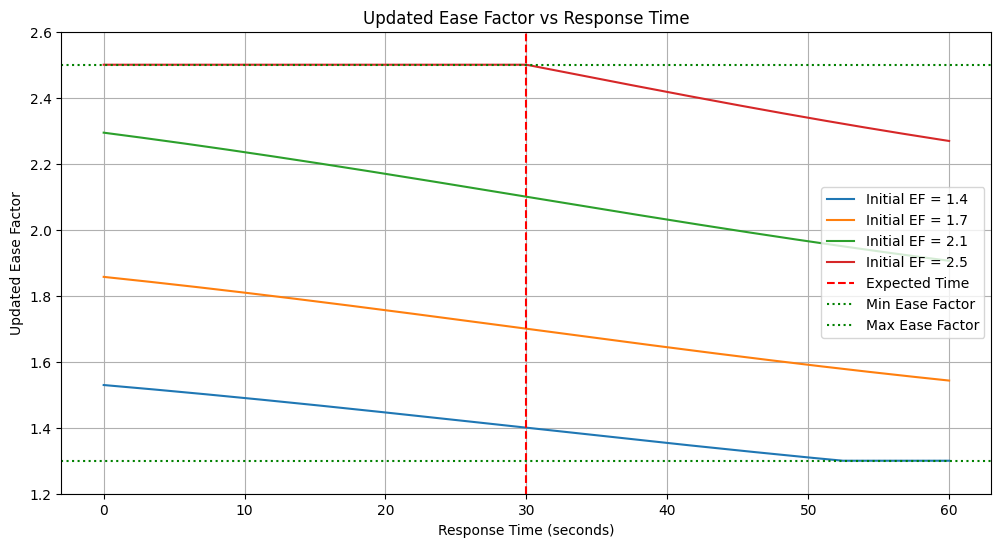

In [21]:
def update_ease_factor(ease_factor, response_time, expected_time=30):
    time_ratio = response_time / expected_time
    performance = max(0, min(2, time_ratio))
    normalized_performance = (performance - 1)
    adjustment = 2 / (1 + math.exp(normalized_performance)) - 1
    new_ease_factor = ease_factor * (1 + 0.2 * adjustment)
    return max(1.3, min(2.5, new_ease_factor))

# 创建响应时间范围（0到60秒）
response_times = np.linspace(0, 60, 200)

# 创建初始 ease factor 值
initial_ease_factors = [1.4, 1.7, 2.1, 2.5]

plt.figure(figsize=(12, 6))

for initial_ef in initial_ease_factors:
    new_ease_factors = [update_ease_factor(initial_ef, rt) for rt in response_times]
    plt.plot(response_times, new_ease_factors, label=f'Initial EF = {initial_ef}')

plt.title('Updated Ease Factor vs Response Time')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Updated Ease Factor')
plt.legend()
plt.grid(True)
plt.ylim(1.2, 2.6)  # 设置y轴范围略大于实际范围，以便更好地查看边界效果
plt.axvline(x=30, color='r', linestyle='--', label='Expected Time')
plt.axhline(y=1.3, color='g', linestyle=':', label='Min Ease Factor')
plt.axhline(y=2.5, color='g', linestyle=':', label='Max Ease Factor')
plt.legend()
plt.show()

In [26]:
from anki.loader import json_loader
from anki.loader import json_loader
from anki.db import Cards
import os
directory = './materials/'
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    data_list = json_loader(file_path)

In [28]:
data_list[0]

{'id': 10880846830001,
 'type': 'sentence',
 'original_content': 'おすすめは何ですか。',
 'romaji_content': 'Osusume1 wa nan1 desu ka.',
 'translated_content': '(您这儿的)推荐菜什么是.',
 'explanation': ''}